In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering 

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
df=pd.read_csv('winequality-red.csv')

In [3]:
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [18]:
df.duplicated().sum()

240

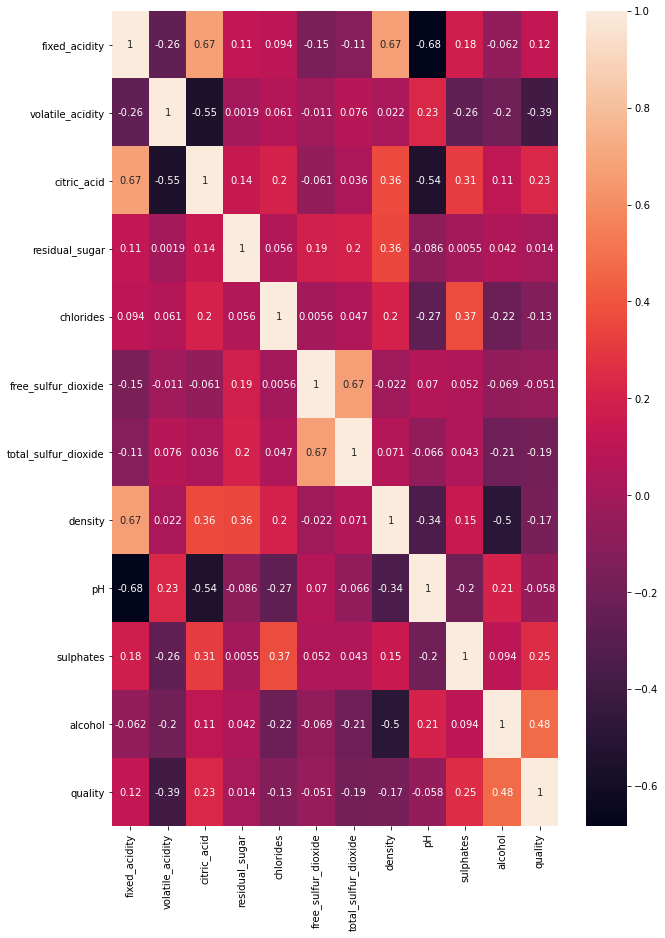

In [21]:
plt.figure(figsize=(10,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

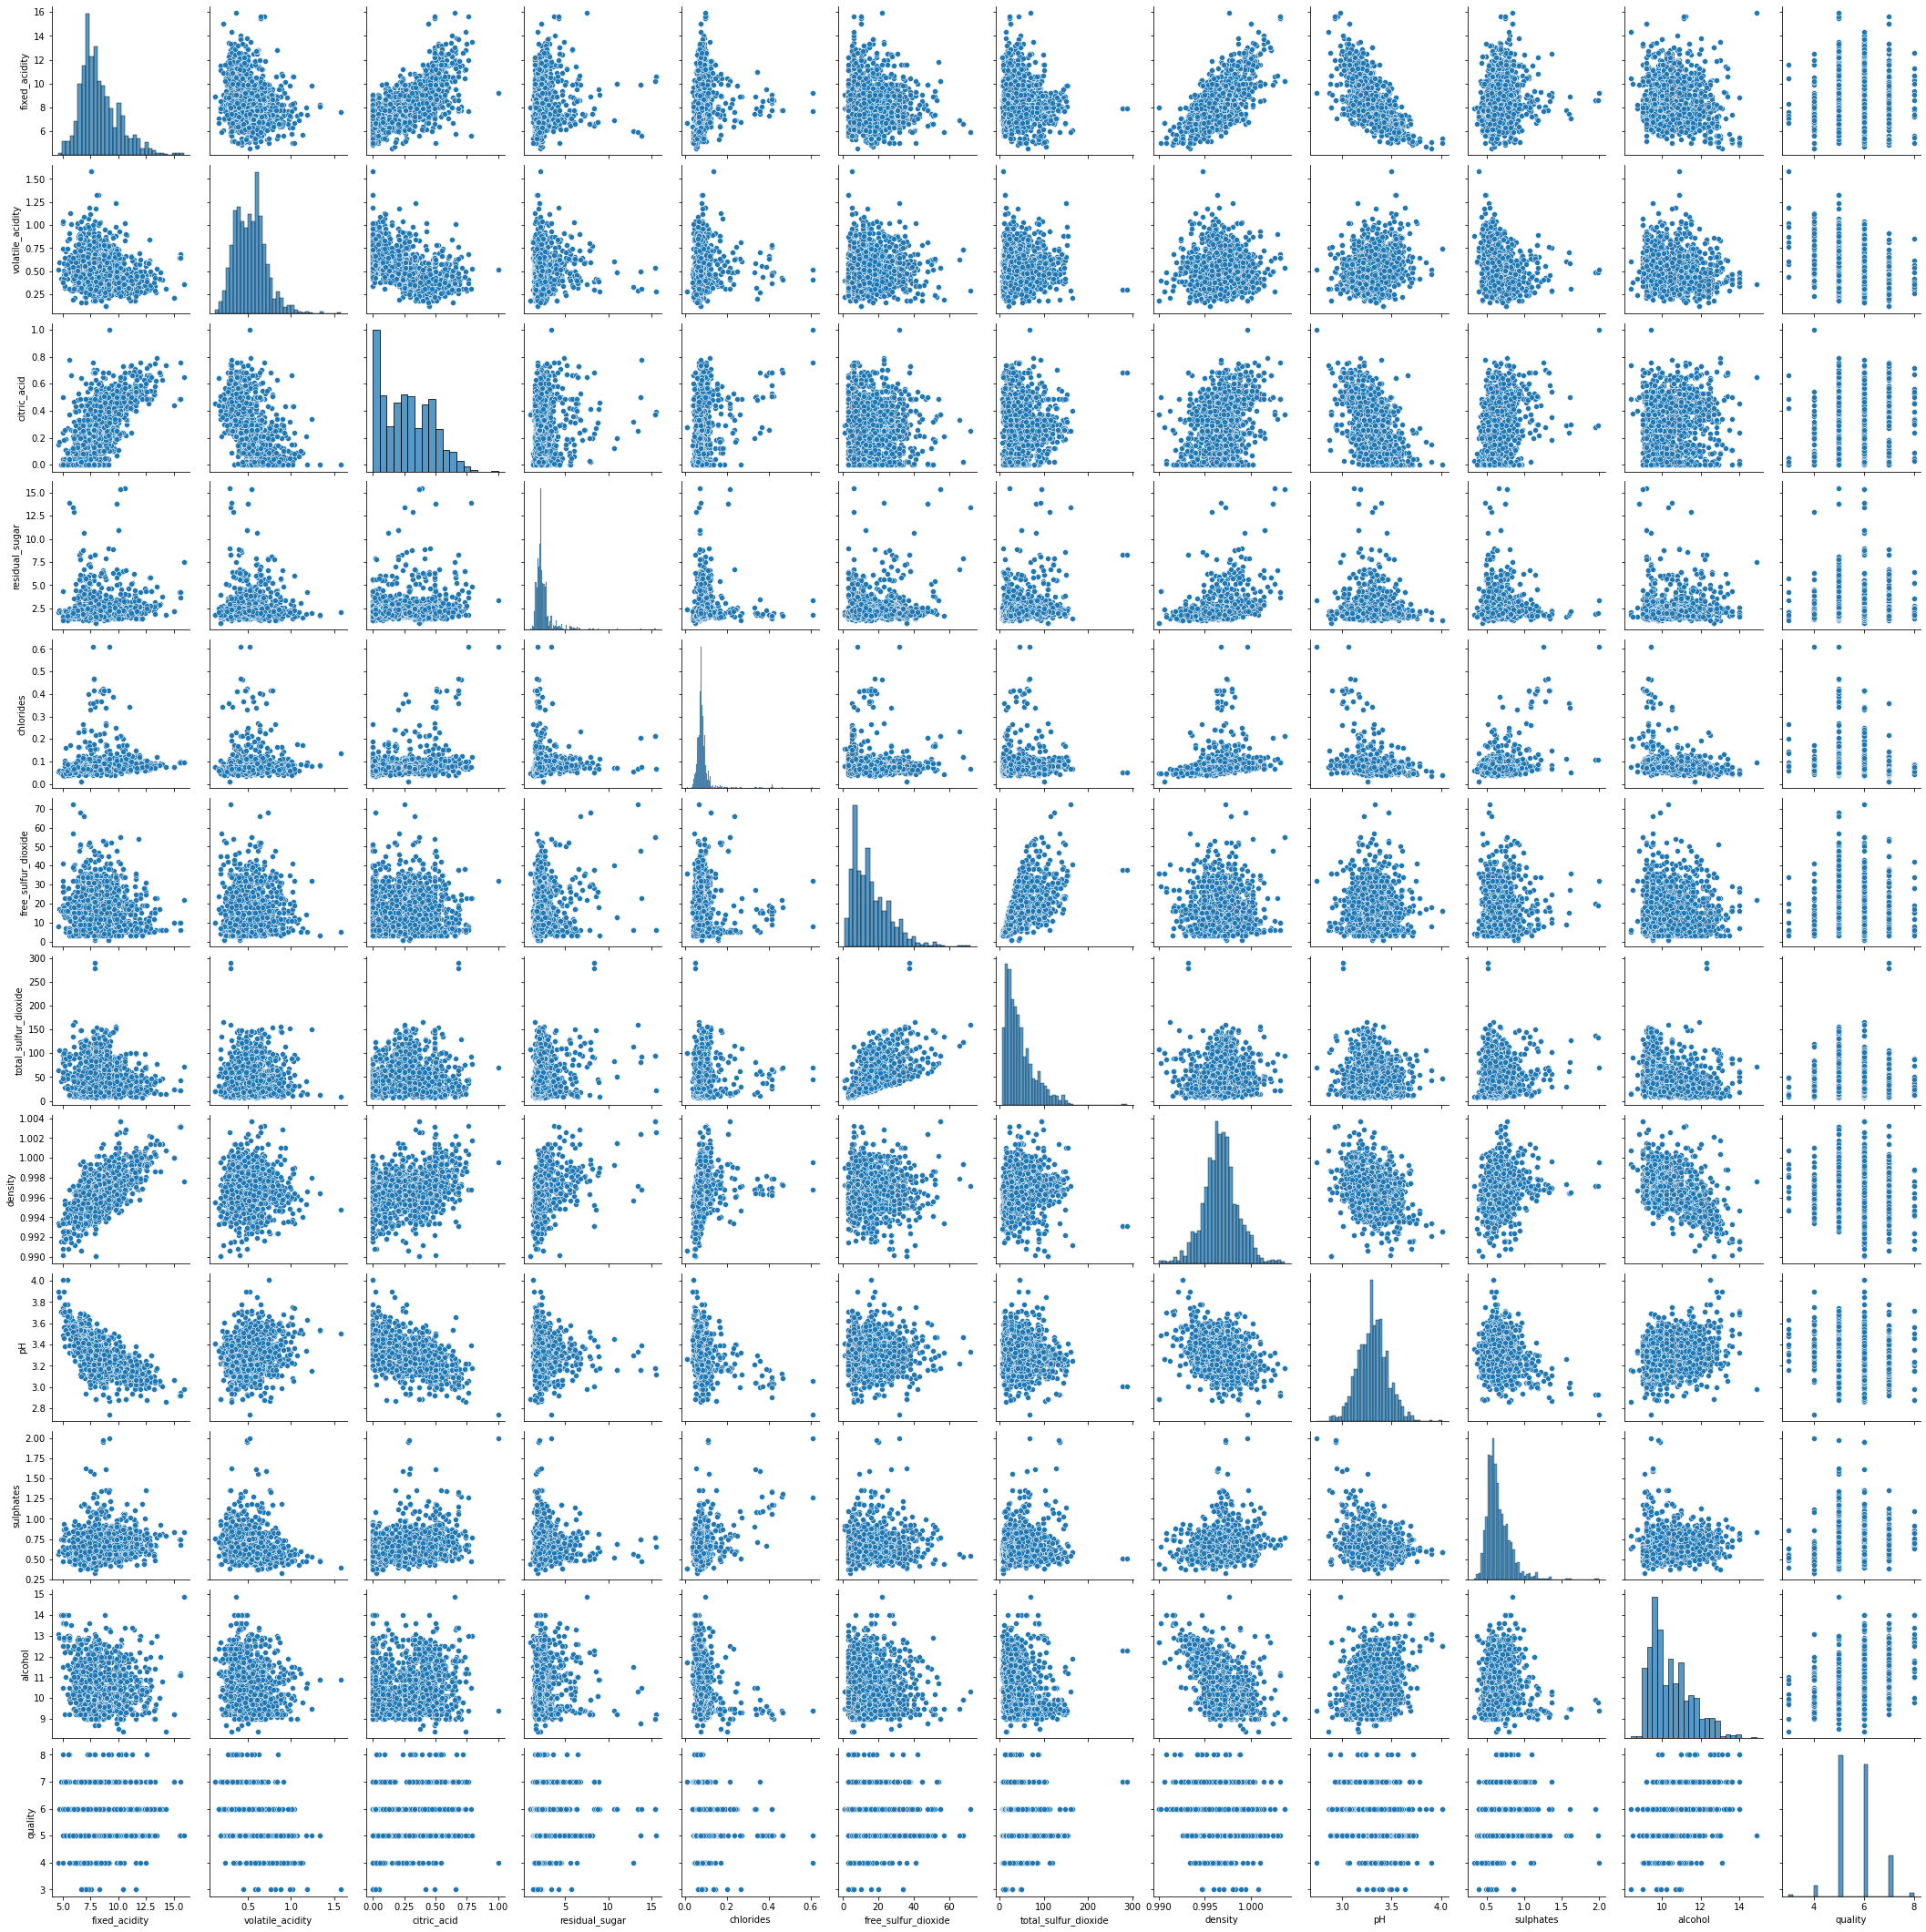

In [22]:
sns.pairplot(df)
plt.show()

In [33]:
Z = linkage(df, method='complete')
c, coph_dists = cophenet(Z , pdist(df))
c

0.8372584449380824

In [30]:
Z = linkage(df, method='single')
c, coph_dists = cophenet(Z , pdist(df))
c

0.48557121262490877

In [31]:
Z1 = linkage(df, method='average')
c, coph_dists = cophenet(Z , pdist(df))
c

0.48557121262490877

In [32]:
Z = linkage(df, method='ward')
c, coph_dists = cophenet(Z , pdist(df))
c

0.6673423324495679

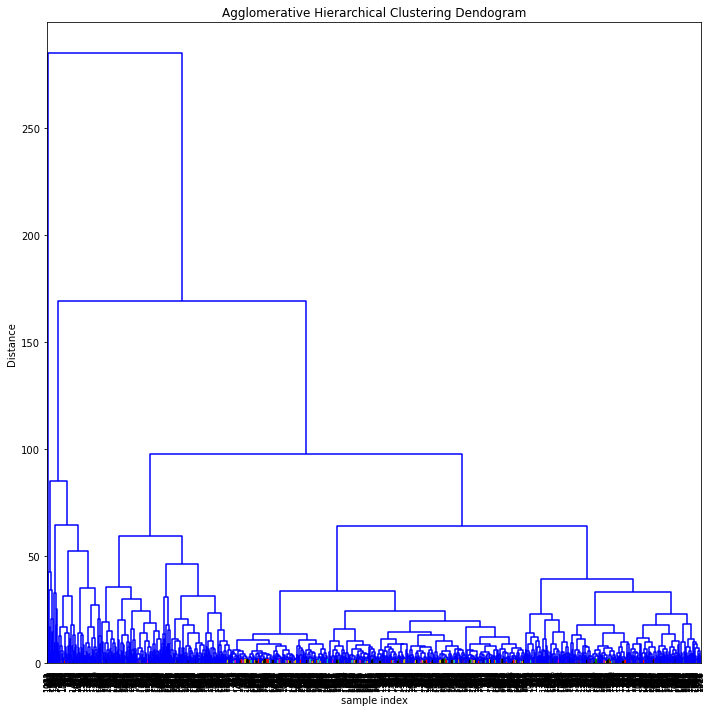

In [34]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., color_threshold=2, leaf_font_size=8. )
plt.tight_layout()

In [36]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='complete')

In [37]:
model.fit(df)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [39]:
df['cluster_labels'] = model.labels_
df['cluster_labels'].value_counts()

0    1467
2     130
1       2
Name: cluster_labels, dtype: int64

In [40]:
from scipy.stats import zscore
X_scaled = df.apply(zscore)

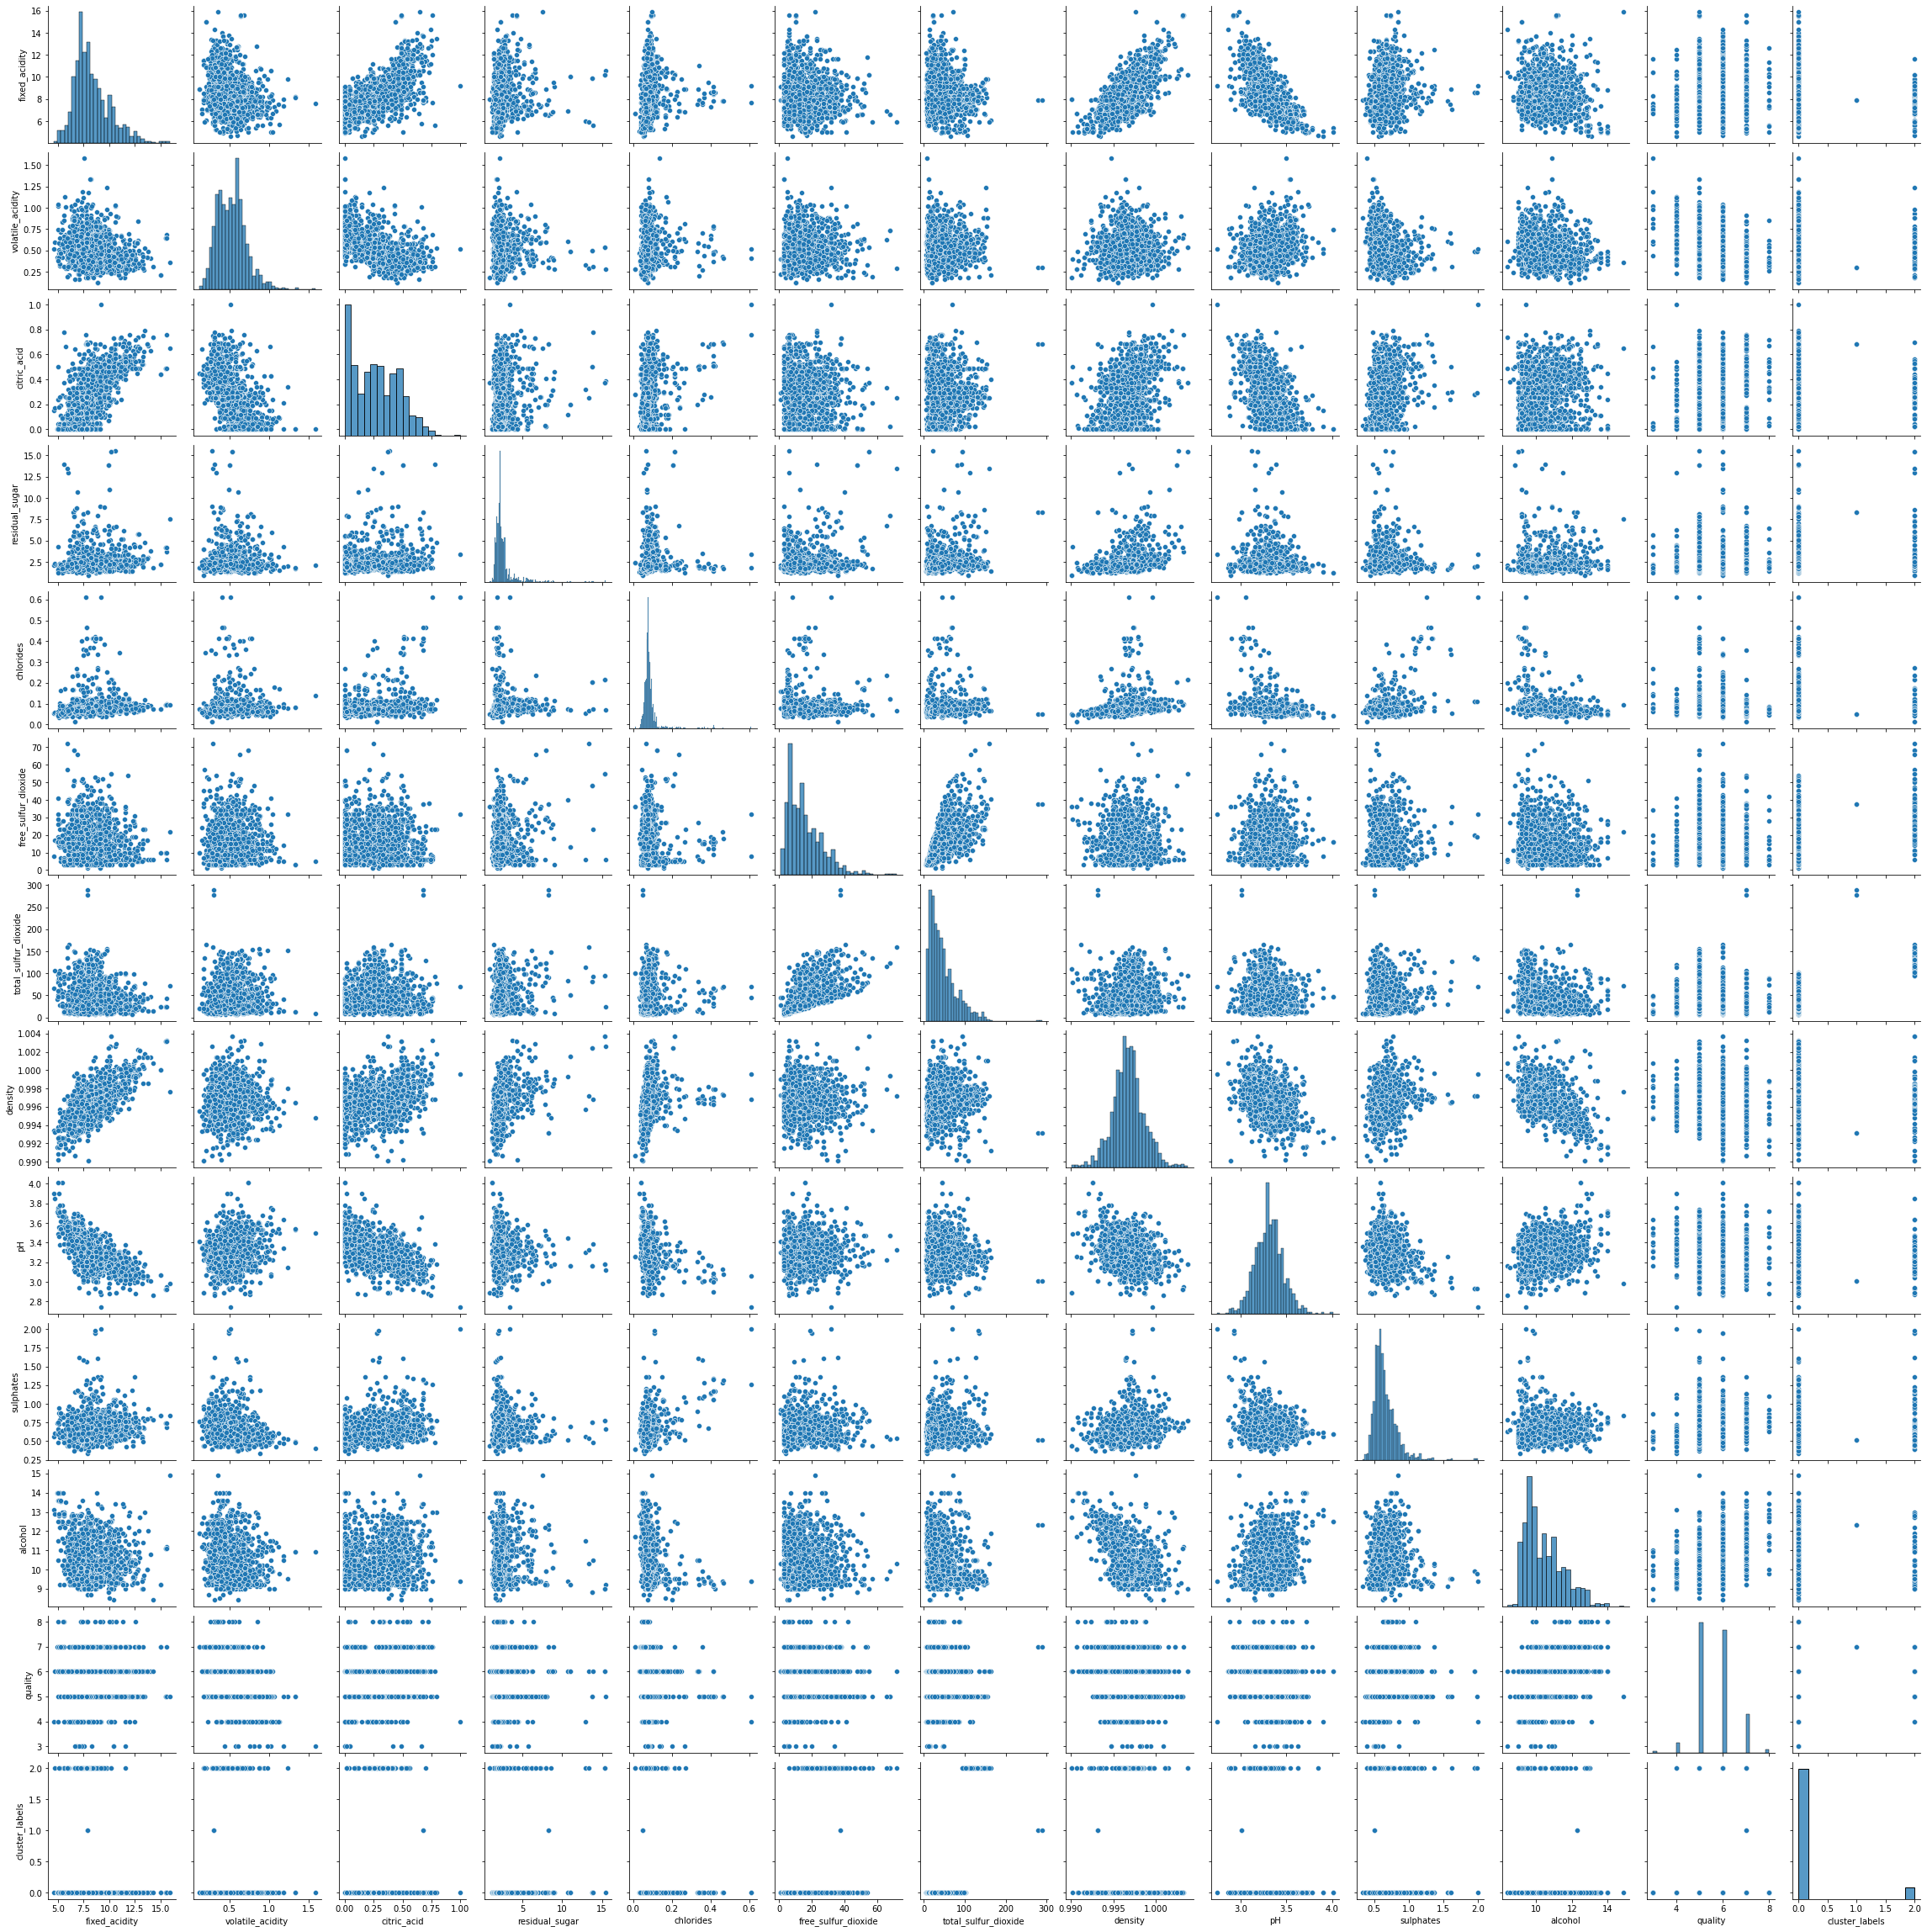

In [41]:
sns.pairplot(df)
plt.show()

In [42]:
Z = linkage(df, method='complete')
c, coph_dists = cophenet(Z , pdist(df))
c

0.8373951248985672

In [43]:
Z = linkage(df, method='single')
c, coph_dists = cophenet(Z , pdist(df))
c

0.4883324165640147

In [44]:
Z1 = linkage(df, method='average')
c, coph_dists = cophenet(Z , pdist(df))
c

0.4883324165640147

In [45]:
Z = linkage(df, method='ward')
c, coph_dists = cophenet(Z , pdist(df))
c

0.6672752745930877

In [46]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='complete')
model.fit(df)
df['cluster_labels'] = model.labels_
df['cluster_labels'].value_counts()

0    1467
2     130
1       2
Name: cluster_labels, dtype: int64